In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

life_expectancy_df = pd.read_csv('./data/life-expectancy.csv')

# *Life Expectancy Data Analysis*
## Loading data set
- As I get to know from the description of this data-set, even though there have been a lot of studies undertaken on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. 
- In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population. 
- I would also like to say that the data was gathered from the World Health Organization (WHO), World Bank, and the United Nations. 
The data was collected from a period of 2000 to 2015 for 193 counties. 
## <b>Let's start the analysis!</b>

In [99]:
life_expectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [100]:
life_expectancy_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [101]:
life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [102]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [103]:
life_expectancy_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [104]:
life_expectancy_df.shape

(2938, 22)

## As we can wee, we have 2938 rows and 22 columns in the dataset. It occurs that it has some missing values. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc.
Finding all data for these countries was time-consuming and hence, it was decided that they exclude these countries from the final model dataset. 
Coming back to columns, almost all their names have obvious meanings, but for a formal sake:
- **Country** - name of the country
- **Year** - year of the observation
- **Status** - status of the country (developed/developing)
- **Life expectancy** - life expectancy in age
- **Adult Mortality** - adult mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- **infant deaths** - Number of Infant Deaths per 1000 population
- **Alcohol** - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- **percentage expenditure** - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- **Hepatitis B** - Hepatitis B (HepB) immunization coverage among 1-year-olds (%) *ZAPALENIE WĄTROBY TYPU B*
- **Measles** - Measles - number of reported cases per 1000 population *ODRA*
- **BMI** - Average Body Mass Index of entire population
- **under-five deaths** - Number of under-five deaths per 1000 population
- **Polio** - Polio (Pol3) immunization coverage among 1-year-olds (%) *ODSETEK ZASZCZEPIONYCH PRZECIWKO POLIO*
- **Total expenditure** - General government expenditure on health as a percentage of total government expenditure (%)
- **Diphtheria** - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) *ODSETEK ZASZCZEPIONYCH PRZECIWKO TOKSOIDOWI BŁONICZEMU, TĘŻCZOWI I KRZTUŚCOWI*
- **HIV/AIDS** - Deaths per 1 000 live births HIV/AIDS (0-4 years)
- **GDP** - Gross Domestic Product per capita (in USD)
- **Population** - Population of the country
- **thinness 1-19 years** - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- **thinness 5-9 years** - Prevalence of thinness among children for Age 5 to 9(%)
- **Income composition of resources** - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- **Schooling** - Number of years of Schooling(years)



## To let to know more about the columns, I will plot distributions of some of them and say a word or two.

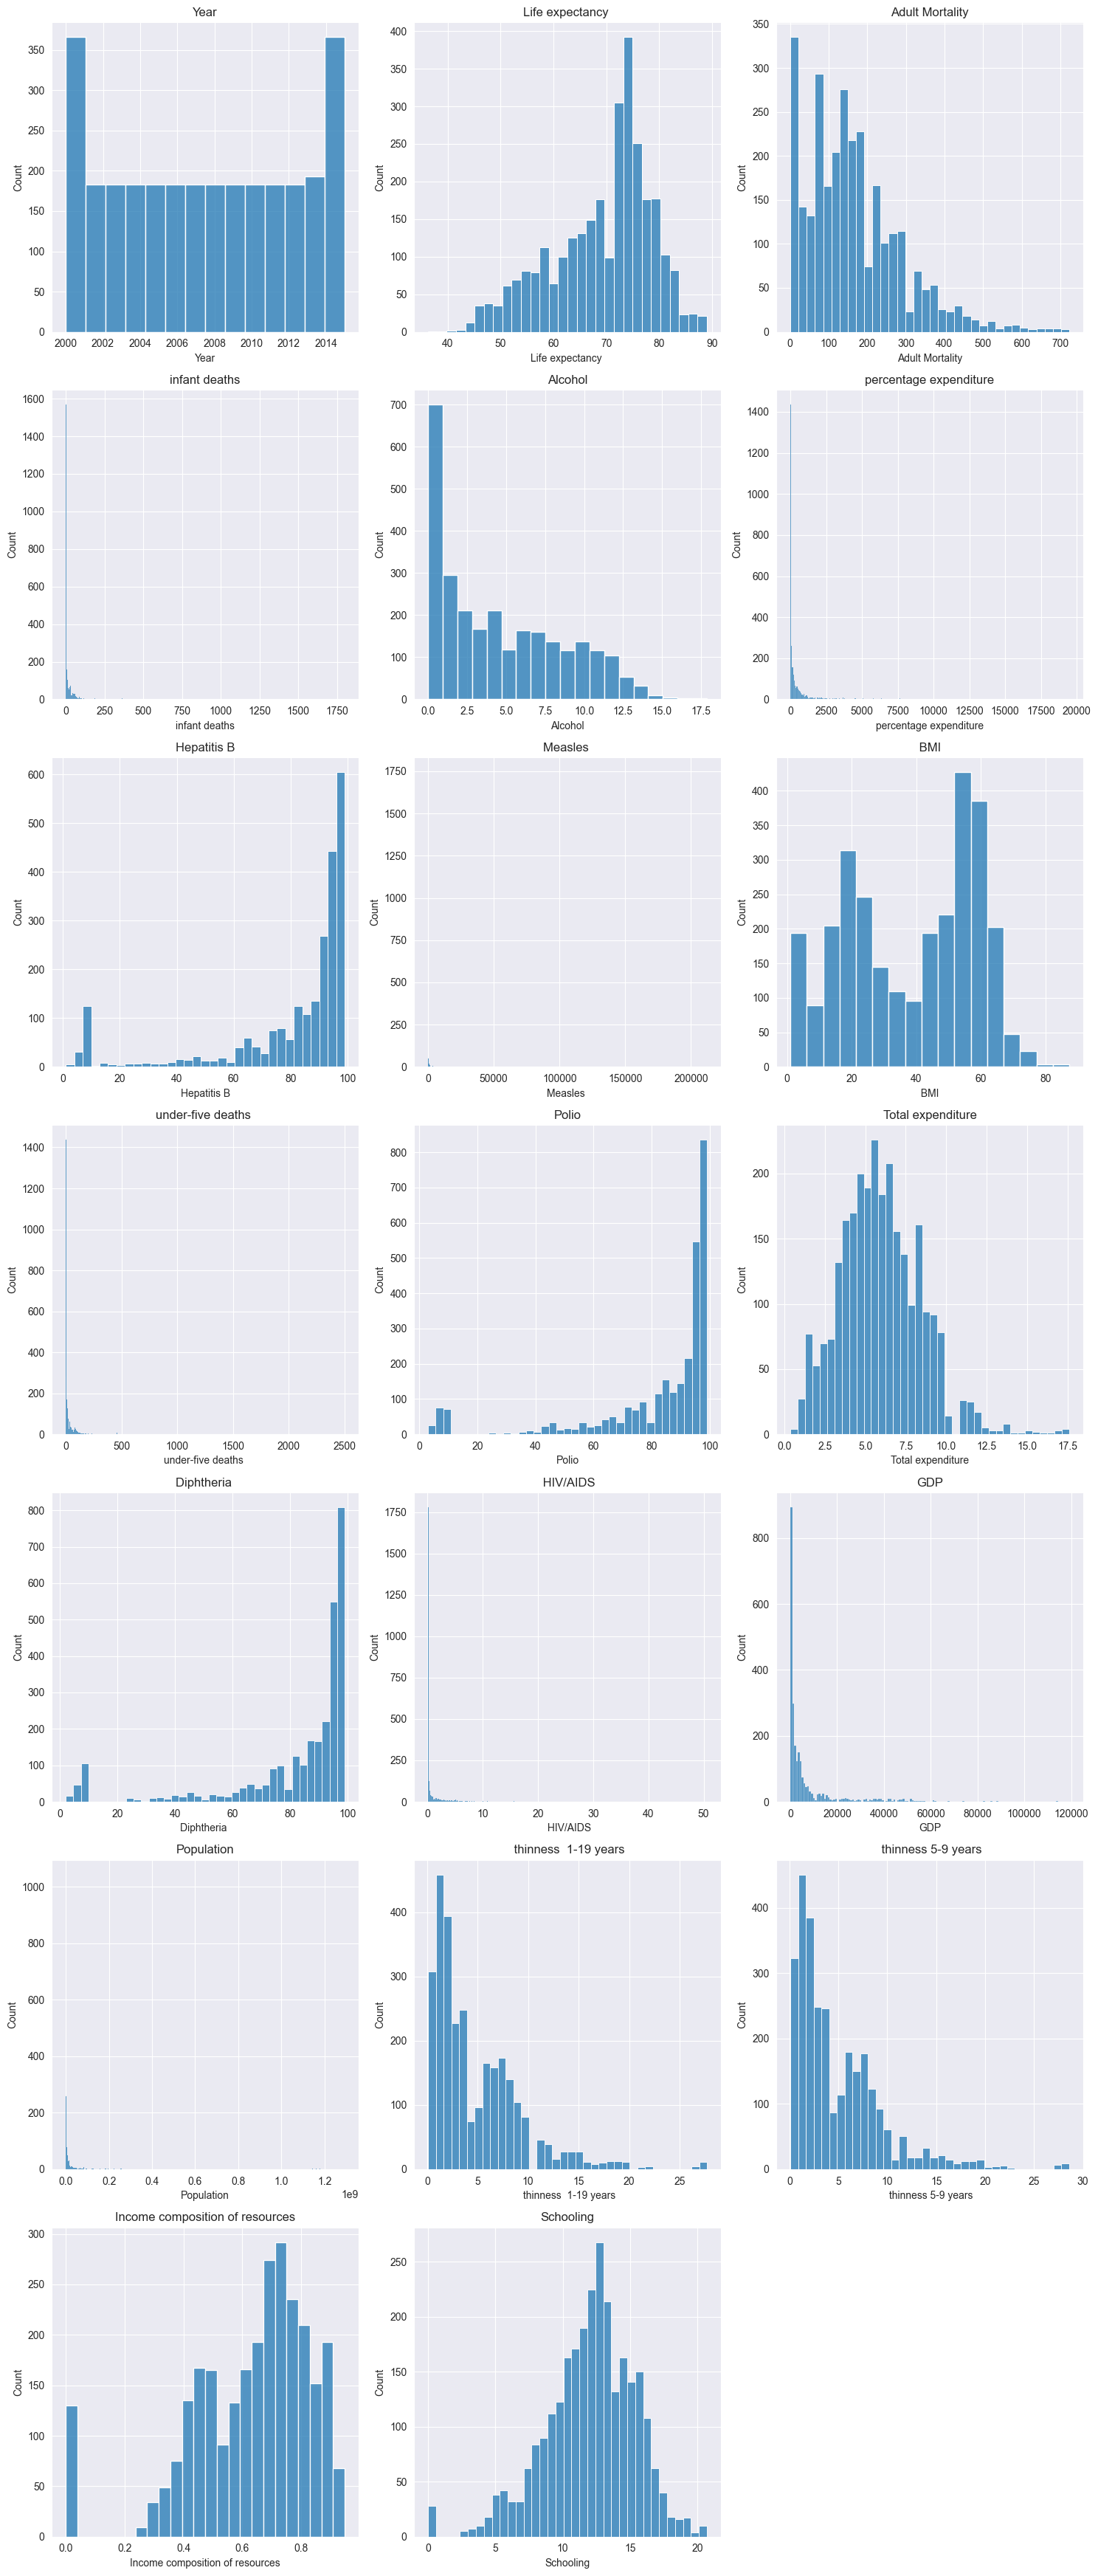

In [105]:
num_cols = 3
num_plots = len(life_expectancy_df.select_dtypes(include="number").columns)
num_rows = int(num_plots / num_cols + 1)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  #making it one dimensional array for easier indexing

for i, column in enumerate(life_expectancy_df.select_dtypes(include="number").columns):
    sns.histplot(data=life_expectancy_df, x=column, ax=axes[i])
    axes[i].set_title(f"{column}")

for j in range(num_plots, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

## From the plots above, I can see that the distributions of the columns are varied. It is worth to mention that some of the columns have a normal distribution, like BMI, while others are skewed, like percentage expenditure.

## Before I proceed with regression analysis, I will take a look at the correlation matrix

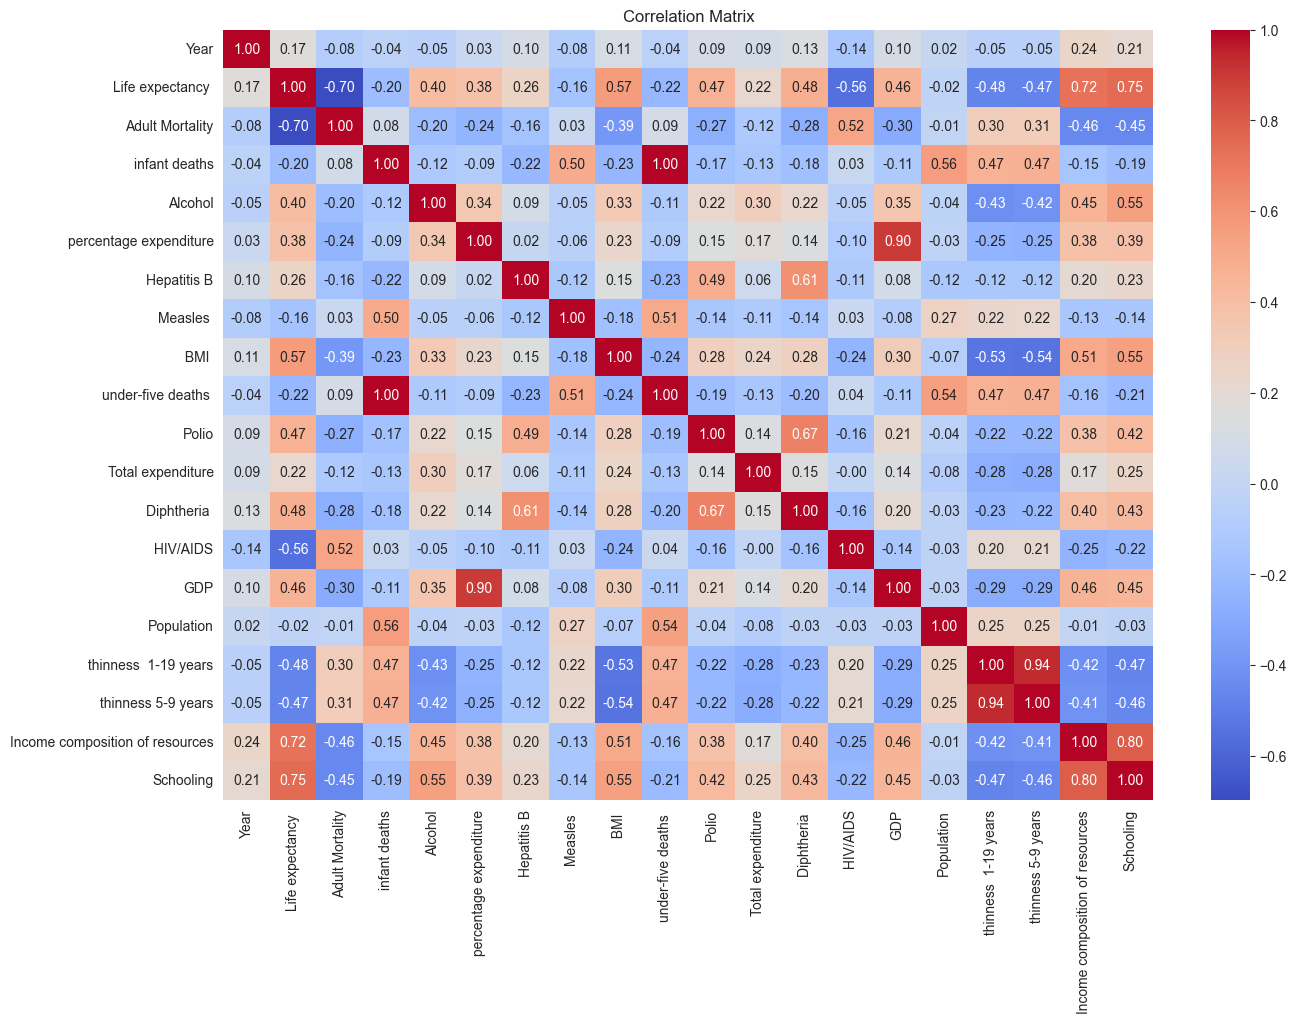

In [106]:
correlation_matrix = life_expectancy_df.select_dtypes(include="number").corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## From the correlation matrix, I can see that there are several variables that are highly correlated with life expectancy. For example: 
- **Adult Mortality** has a negative correlation with life expectancy, which means that as adult mortality rates increase, life expectancy decreases.
- **BMI** has a positive correlation with life expectancy, which means that as the average body mass index of the population increases, life expectancy also increases. **This is probably not that simple;)**
- **Schooling** has a positive correlation with life expectancy, which means that as the number of years of schooling increases, life expectancy also increases.
- **Income composition of resources** has a positive correlation with life expectancy, which means that as the human development index in terms of income composition of resources increases, life expectancy also increases.
- **HIV/AIDS** has a negative correlation with life expectancy, which means that as the number of deaths per 1,000 live births due to HIV/AIDS increases, life expectancy decreases.
## Having that done, I will do a simple linear regression model for predicting life expectancy based on the amount of years of schooling.

R^2 equals: 0.5654670965580709
Mean squared error equals: 38.061879777463936
Intercept equals: 44.10888913291282
Coefficients equals: [2.1034531]


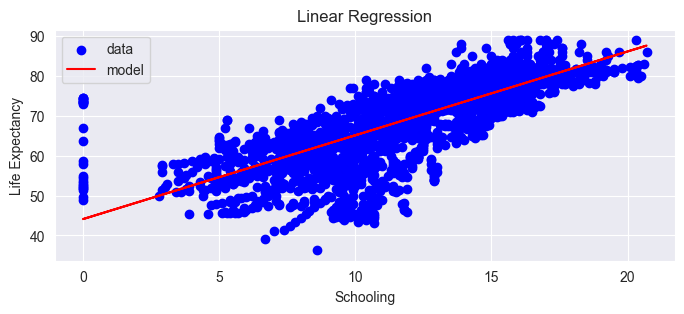

In [107]:
# Drop rows with any missing values
life_expectancy_df_cleaned = life_expectancy_df.dropna(subset=['Schooling', 'Life expectancy '])

x = life_expectancy_df_cleaned.Schooling.values.reshape(-1, 1)
y = life_expectancy_df_cleaned['Life expectancy '].values.reshape(-1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

print(f"R^2 equals: {model.score(x, y)}")
print(f"Mean squared error equals: {mean_squared_error(y, y_pred)}")
print(f"Intercept equals: {model.intercept_}")
print(f"Coefficients equals: {model.coef_}")

plt.figure(figsize=(8, 3))
plt.scatter(x, y, color='blue', label='data')
plt.plot(x, y_pred, color='red', label='model')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression')
plt.grid(True)
plt.legend()
plt.show()


# From the results visible above, we can see the tendency of longevity increasing with the number of years spent in school.
## 1. R<sup>2</sup> = 0.57
- which means that 57% of the variance in life expectancy can be explained by the number of years of schooling. This is a moderate score, indicating that while there is a relationship between the two variables, there are likely other factors that also play a role in determining life expectancy
## 2. MSE = 38
- which is the average of the squared differences between the actual values and the predicted values. In this context, the MSE of 38 suggests that the model's predictions deviate from the actual values by an average of 38 years. This is a relatively low error, indicating that the model's predictions are fairly close to the actual values.
## 3. Intercept = 44.11 
- this means that the model predicts that the life expectancy is 44.11 years when the number of years of schooling is zero. This is not a realistic scenario, as it is unlikely that a person with zero years of schooling would live to be 44 years old. This is a limitation of linear regression, as it can extrapolate beyond the range of the data.
## 4. Coefficients = 2.1
- this means that, on average, for every additional year of schooling, the life expectancy increases by 2.1 years. This positive coefficient indicates that there is a positive relationship between the number of years of schooling and life expectancy, which is intuitive and supported by the data.
## Gathering all that information together, I can say that the model is quite useful, but is certainly not perfect. There are other factors that can influence life expectancy, such as access to healthcare, income, lifestyle choices, and genetic factors. These factors are not captured in the model.


## Now, let's make a higher degree polynomial regression model for predicting life expectancy based on the number of years of schooling. 
I am going to measure the performance of the model by calculating the mean squared error (MSE) and plotting the regression line along with the data points.

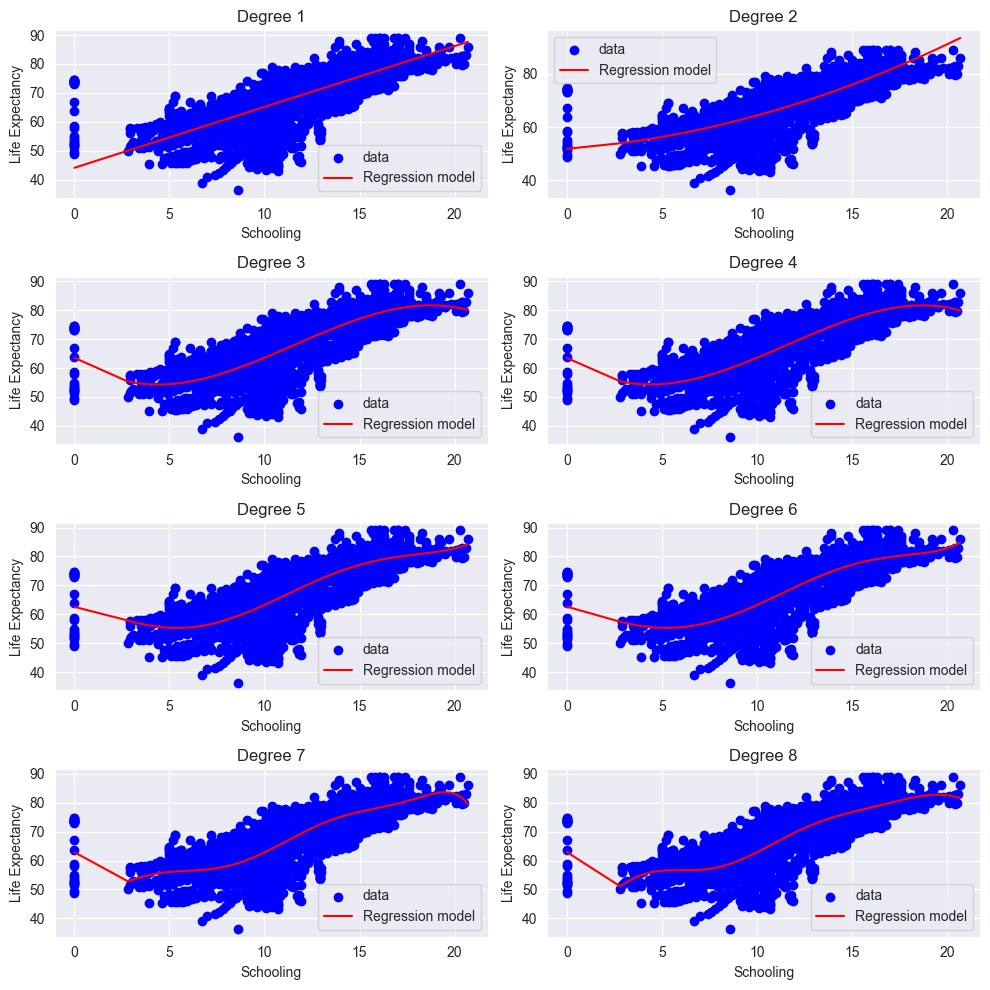

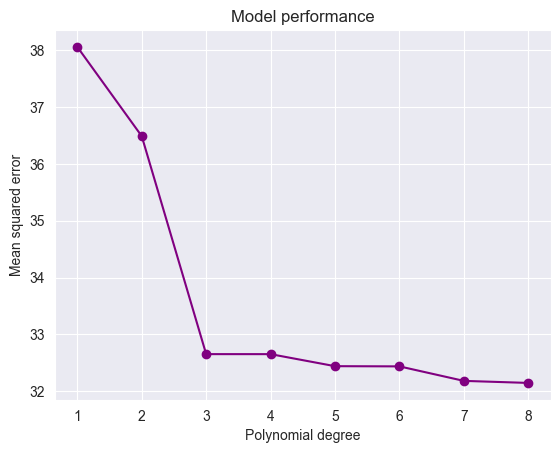

In [108]:
mse_values = []

fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.ravel()  #making it one dimensional array for easier indexing

for order in range(1, 9):
    poly = PolynomialFeatures(order, include_bias=False)
    x_order = poly.fit_transform(x)

    poly_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
    poly_model.fit(x_order, y)

    y_poly_pred = poly_model.predict(x_order)

    mse = mean_squared_error(y_poly_pred, y)
    mse_values.append(mse)

    sorted_indices = np.argsort(x.flatten())
    x_sorted = x[sorted_indices]
    y_poly_pred_sorted = y_poly_pred[sorted_indices]

    axes[order - 1].scatter(x, y, color='blue', label='data')
    axes[order - 1].plot(x_sorted, y_poly_pred_sorted, color='red', label='Regression model')
    axes[order - 1].set_xlabel('Schooling')
    axes[order - 1].set_ylabel('Life Expectancy')
    axes[order - 1].set_title(f'Degree {order}')
    axes[order - 1].legend()

plt.tight_layout()
plt.show()

plt.figure()
plt.plot(range(1, 9), mse_values, marker='o', color='purple')
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")
plt.title("Model performance")
plt.grid(True)
plt.show()


## 1. Analysis of Polynomial Regression Models
- the plots above show the regression models for different polynomial degrees ranging from 1 to 8. As expected, higher-degree polynomials are more flexible which does not necessarily mean that they are better.
- polynomial of the first degree is just a straight line as expected mathematically.
- polynomial of the second degree is a quadratic curve. It seems to capture the data better than the linear model
- as we increase the degree, the model becomes more flexible and can fit the data more closely. However, this can lead to overfitting, where the model learns the noise in the training data rather than the underlying pattern. This is evident in the higher-degree polynomials, where the model starts to oscillate between data points, suggesting that it is fitting the noise rather than the true relationship.
- from the seventh degree onwards, the model starts to exhibit erratic behavior, with sharp peaks and straight lines between data points. This may be a sign of overfitting.
## 2. Model performance vs Polynomial Degree
- the plot of mean squared error (MSE) against polynomial degree shows how the model's performance changes with increasing complexity.
- as the degree increases, the error is getting smaller, which is expected since the model can fit the training data more closely.
- However, this does not necessarily mean that the model is better. The decrease in error may be due to the model fitting the noise in the training data.

## 1. Changes in regression models
- after splitting the data into training and test samples, the regression models show similar patterns to the previous analysis.
- however, the 'sharp peak behavior' is now more pronounced than before, especially in the higher-degree polnomials.
## 2. Model Performance
- the plot of mean squared error (MSE) against polynomial degree shows how the model's performance changes with increasing complexity.
- We can observe that now the test error starts to grow after the fourth-degree polynomial
- this is a clear sigh that with higher degree polynomials we do not get a better model, but we may be overfitting the training data
- With that knowledgle collected, I now think that the third-degree polynomial regression model is the best choice for this dataset. It has a relatively low train error, the lowest test error and seems to capture the underlying pattern without overfitting.

# Now I will do my best to find the variables that actually affect the life expectancy.  
- I want to use built-in **greedy** function of sklearn to find the most important features.
- I will split the data into training, validation and test samples.
- I will use the training sample to train the model and the validation sample to select the best features.
- I will then evaluate the model on the test sample.
- I will use the mean squared error as the evaluation metric. 

In [109]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector

x = life_expectancy_df_cleaned.drop(columns=['Country', 'Year', 'Status', 'Life expectancy '])
y = life_expectancy_df_cleaned['Life expectancy '].values

# Split data into training, validation, and test samples on the proportion 60%, 20%, 20%
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=44)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=44)

model = LinearRegression()

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('feature_selector',
     SequentialFeatureSelector(model, n_features_to_select=5, direction='forward', scoring='r2', cv=5)),
])

pipeline.fit(x_train, y_train)

selected_features = x_train.columns[pipeline.named_steps['feature_selector'].get_support()].tolist()

print(f"Selected features: {selected_features}")


Selected features: ['Adult Mortality', 'Diphtheria ', ' HIV/AIDS', 'Income composition of resources', 'Schooling']


# Explanation of the code above:
## 1. Preparing the data:
- I have removed the columns that are not useful for the regression analysis in my opinion.
## 2. Splitting the data:
- I have split the data into training, validation, and test samples on the proportion 60%, 20%, 20%.
- I have used random_state=44 to ensure reproducibility of the results.
## 3. Pipeline:
- I was dealing with missing values in the dataset, so I have used Pipeline which connects different types of transformers including imputing and feature selection.
- imputing is a process of replacing missing values with some statistical values. 
- I have used mean imputing strategy.
- feature selection is a process of selecting the most important features from the dataset.
## 4. Sequential Feature Selector:
- I have used Sequential Feature Selector to select the best features for the model.
- I have set the number of features to select to 5.
- I have used forward selection strategy, which means that the algorithm starts with an empty set of features and adds one feature at a time.
- I have used r2 scoring metric, which is the coefficient of determination. It measures how well the model fits the data.
- I have used 5-fold cross-validation to evaluate the model.
## 5. Cross-validation:
- I have used 5-fold cross-validation to evaluate the model.
- Cross-validation splits the data into 5 parts.
- Model is trained 5 times, each time using different part of the data as the validation set and the rest as the training set.
- The final score is the average of the scores from each fold.
- Cross-validation helps to ensure that the model generalizes well to new data.
- It also helps to reduce the variance of the model's performance estimate.
# Results:
## the selected features are: 
- 'Adult Mortality', 'Diphtheria ', ' HIV/AIDS', 'Income composition of resources', 'Schooling'
- these features are the most important for predicting life expectancy based on the model's evaluation metric (r2 score)
# Now I will evaluate the model


Validation R^2: 0.914
Validation MSE: 7.892
Test R^2: 0.880
Test MSE: 10.127


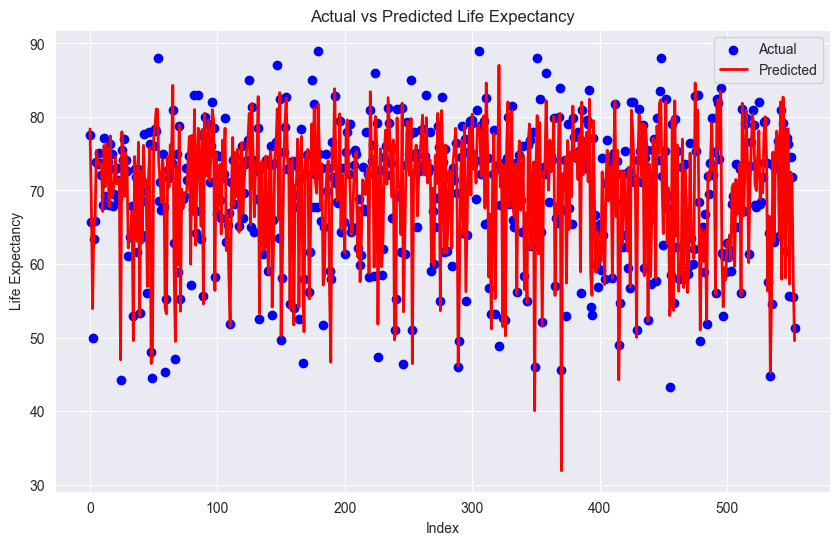

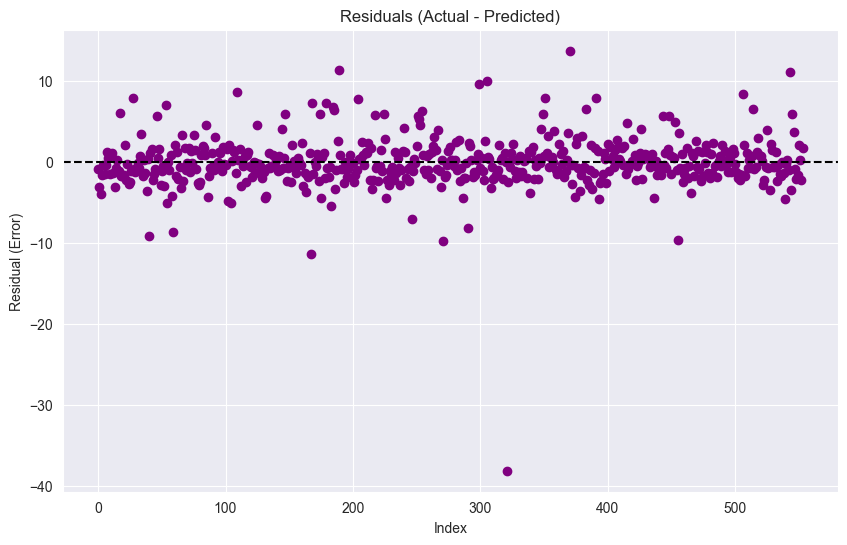

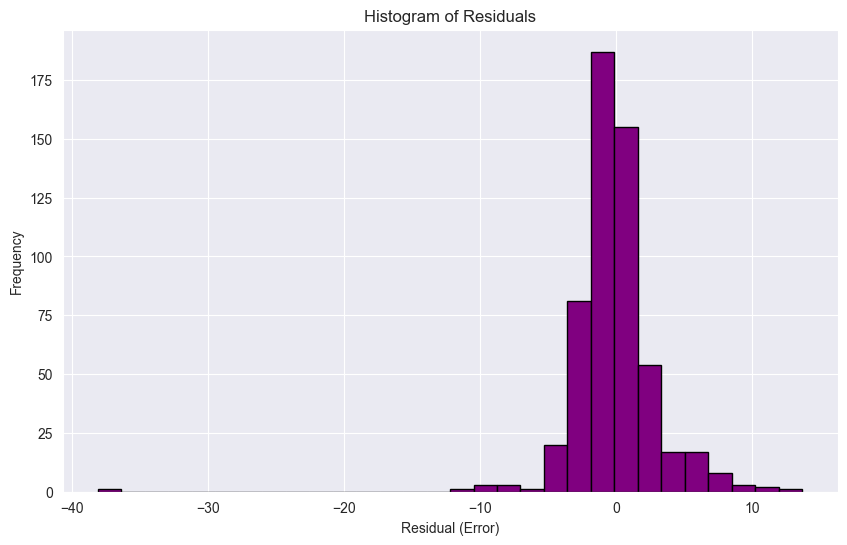

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

selected_features = ['Adult Mortality', 'Diphtheria ', ' HIV/AIDS', 'Income composition of resources', 'Schooling']
x_train_selected = x_train[selected_features]
x_valid_selected = x_valid[selected_features]
x_test_selected = x_test[selected_features]

degree = 4
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('model', LinearRegression())
])

pipeline.fit(x_train_selected, y_train)

y_valid_pred = pipeline.predict(x_valid_selected)
y_test_pred = pipeline.predict(x_test_selected)

valid_r2 = r2_score(y_valid, y_valid_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Validation R^2: {valid_r2:.3f}")
print(f"Validation MSE: {valid_mse:.3f}")
print(f"Test R^2: {test_r2:.3f}")
print(f"Test MSE: {test_mse:.3f}")

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_test)), y_test_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred
plt.scatter(range(len(residuals)), residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residual (Error)')
plt.title('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', edgecolor='black')
plt.xlabel('Residual (Error)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()


# Some comments on the results:
## 1. Pipeline:
- here I have also used a pipeline, but I also added a StandardScaler to scale the features.
- scaling the features helps the model to fit the data better, especially when the features have different scales.
- scaling prevents from situations where some features dominate the others.
- it can also help to speed up the training process.
## 2. Validation:
- I could have not separated the test data into validation and test samples, but I wanted to have a better evaluation of the model.
- it is usually a good practice when we have to choose a limited number of features.
## 3. Evaluation:
- **Validation** $R^2$=0.914 and **Test** $R^2$=0.88 which means that the model explains 91.4% and 88% of the variance in the validation and test data respectively.
- **Validation** MSE=7.892 and **Test** MSE=10.127 which means that the model's predictions deviate from the actual values by an average of 7.892 and 10.127 years in the validation and test data respectively.
- **Residuals** are centered around zero, which is a good sign. It means that the model is making predictions that are close to the actual values.<br>
However, there are some outliers in the residuals, which suggests that the model is not perfect and there are some data points that are not well predicted.
- **Overall**, the model is quite hard to rate. It has a high $R^2$ score and a low MSE, which are good signs. However, there are some outliers in the residuals, which suggests that the model is not perfect and there are some data points that are not well predicted.<br>
Also, the data of the model was lacking some cells which I had to fill with the mean value. This can affect the model's performance.<br>
What is more, the data scales were different, so I had to scale them. This can also affect the model's performance.<br>